# Gradient Descent 
This notebook aims to help gain a better understanding of gradient descents by defining a gradient descent step function and combining it with a line search algorithm to optimize the parameters of a 1D neural network

### Imports 
Import the function needed to define the gradient descent step function, line search algorithm, and other functions as well as define the plotting functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

### Define Training Data
Define 12 input/output pairs as training data for the neural network model

In [2]:
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

### Define a 1D Neural Network Model 
Define a 1D neural network model with a slope (phi[1]) and y-intercept (phi[0])

In [3]:
def model(phi,x):
  y_pred = phi[0]+phi[1] * x
  return y_pred

### Define a 1D Neural Network Plotting Function

In [4]:
def draw_model(data,model,phi,title=None):
  x_model = np.arange(0,2,0.01)
  y_model = model(phi,x_model)

  fig, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  if title is not None:
    ax.set_title(title)
  plt.show()

### Define Parameters 
Define parameters for the 1D neural network model

In [5]:
phi = np.zeros((2,1))
phi[0] = 0.6  # Intercept
phi[1] = -0.2 # Slope

### Plot the 1D Neural Network Model

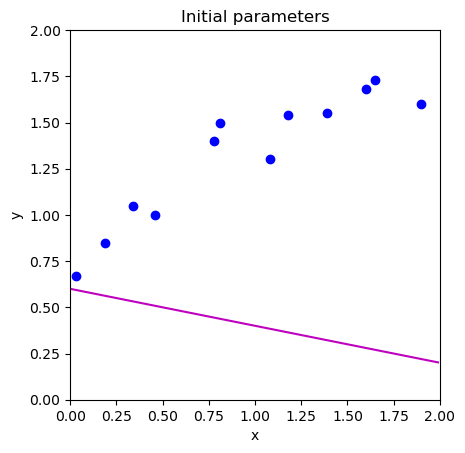

In [6]:
draw_model(data,model,phi, "Initial parameters")

### Define Loss Function (Least Squares Loss)

In [7]:
def compute_loss(data_x, data_y, model, phi):
  pred_y = model(phi, data_x)
  loss = np.sum((pred_y - data_y)**2)

  return loss

### Compute the Loss 
Compute the loss of the 1D neural network model using the training data and the least squares loss function

In [8]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Loss = %3.3f'%(loss))

Loss = 12.367


### Define a Least Squares Loss Function Plotting Function

In [9]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Define a colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[intercepts_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([1,-1])
  ax.set_xlabel('Intercept phi[0]'); ax.set_ylabel('Slope, phi[1]')
  plt.show()

### Plot the Computed Least Squares Loss Function

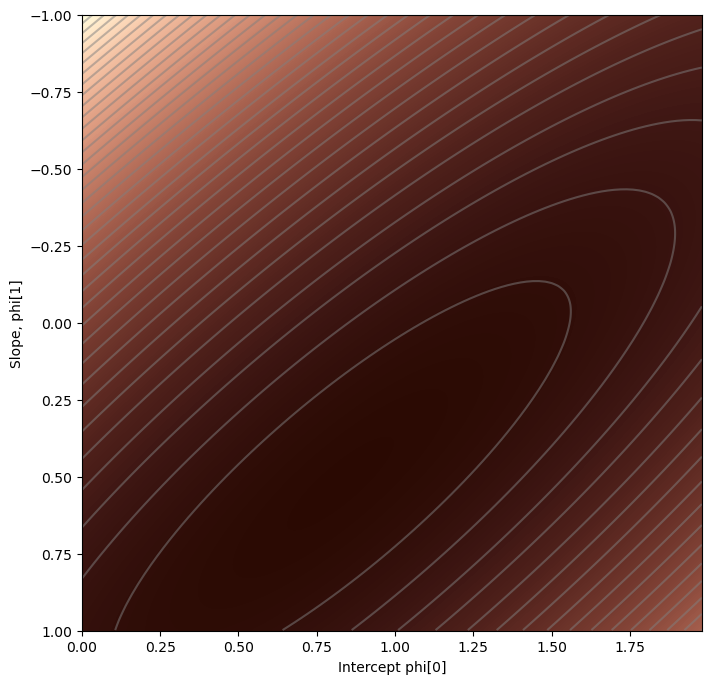

In [10]:
draw_loss_function(compute_loss, data, model)

### Define Gradient Function 
Define a function to compute the gradient of the defined 1D neural network model

In [26]:
def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = 2 * np.sum(phi[0] + phi[1]*data_x - data_y)
    dl_dphi1 = 2 * np.sum((phi[0] + phi[1]*data_x - data_y) * data_x)

    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

### Compute the Gradient 
Compute the gradient of the 1D neural network model

In [28]:
gradient = compute_gradient(data[0,:],data[1,:], phi)

### Define a 1D Loss Function 
Define a 1D loss function that is only dependent on the step size (alpha) of the point towards the negative gradient. Use the 1D loss function in the line search algorithm to compute the step size that results in the smallest loss.

In [29]:
def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
  # Return the loss after moving this far
  return compute_loss(data[0,:], data[1,:], model, phi_start - search_direction * dist_prop)

### Define a Line Search Algorithm

In [30]:
def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 15, verbose=False):
    # Initialize four points along the interval being searched
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # Loop the line search till the minimum of the loss function has been accurately estimated
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate the loss of all four points
        lossa = loss_function_1D(a, data, model, phi, gradient)
        lossb = loss_function_1D(b, data, model, phi, gradient)
        lossc = loss_function_1D(c, data, model, phi, gradient)
        lossd = loss_function_1D(d, data, model, phi, gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Rule #1: If point A is less than points B, C, and D then halve distance from A to points B, C, and D
        if np.argmin((lossa,lossb,lossc,lossd))==0:
          b = a+ (b-a)/2
          c = a+ (c-a)/2
          d = a+ (d-a)/2
          continue

        # Rule #2: If point b is less than point c then
        # 1) point d becomes point c, and
        # 2) point b becomes 1/3 between a and new d
        # 3) point c becomes 2/3 between a and new d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #3: If point c is less than point b then
        # 1) point a becomes point b, and
        # 2) point b becomes 1/3 between new a and d
        # 3) point c becomes 2/3 between new a and d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Compute the result
    return (b+c)/2.0

### Define Graident Descent Step Function 
Define a gradient descent step function which uses the negative gradient and the step size to update all the parameters to decrease the loss function of the 1D neural network model

In [31]:
def gradient_descent_step(phi, data,  model):
  gradient = compute_gradient(data[0,:],data[1,:], phi) 
  alpha = line_search(data, model, phi, gradient)  
  phi = phi - alpha * gradient
  return phi

### Define Parameters
Define parameters for the 1D neural network model 

In [32]:
n_steps = 10
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 1.6
phi_all[1,0] = -0.5

### Compute Initial Loss 
Compute the initial loss of the 1D neural network model with the initial parameters

In [33]:
loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])

### Plot the Initial 1D Neural Network

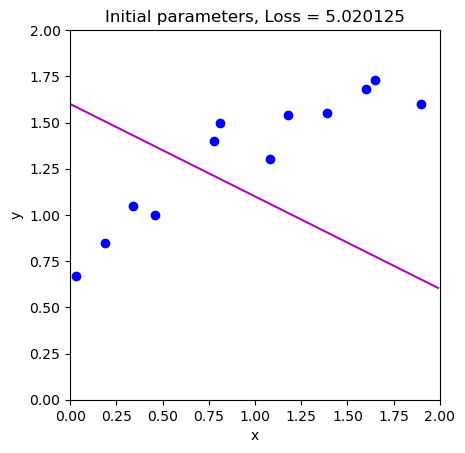

In [34]:
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

### Minimize the Loss Function 
Minimize the loss function by computing the gradient descent and the step size, using the two values to compute the gradient descent step to adjust the parameter values and decrease the loss function of the 1D neural network.

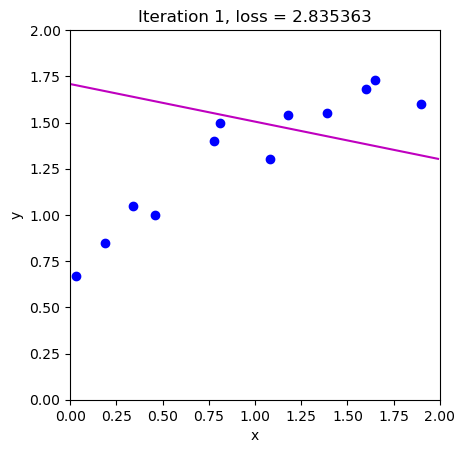

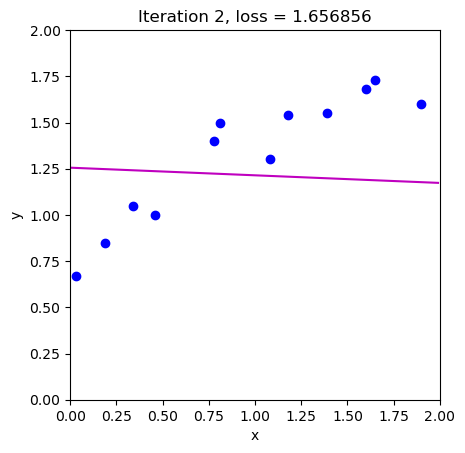

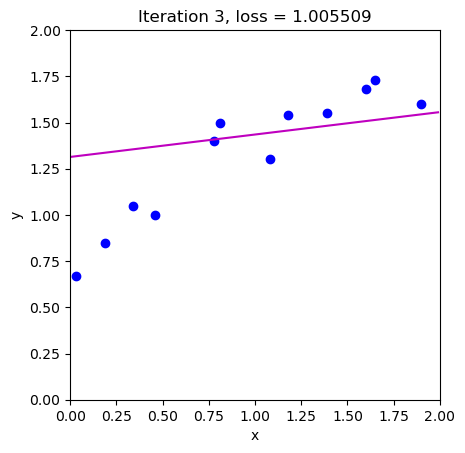

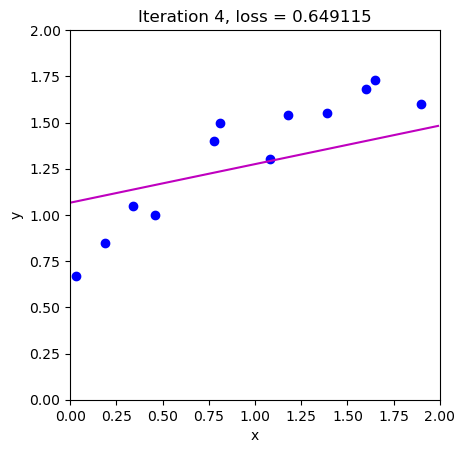

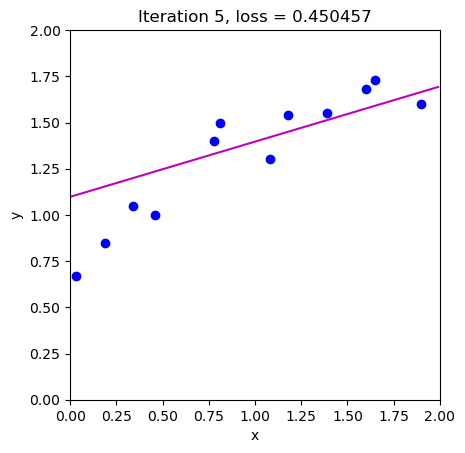

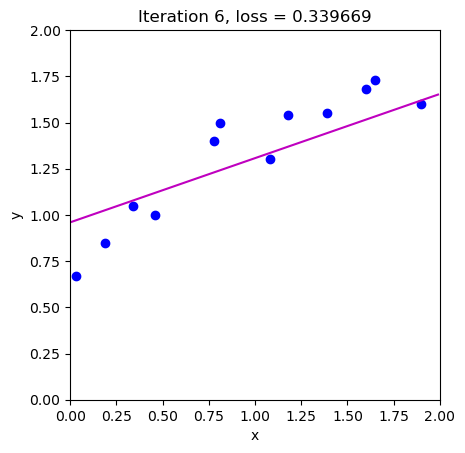

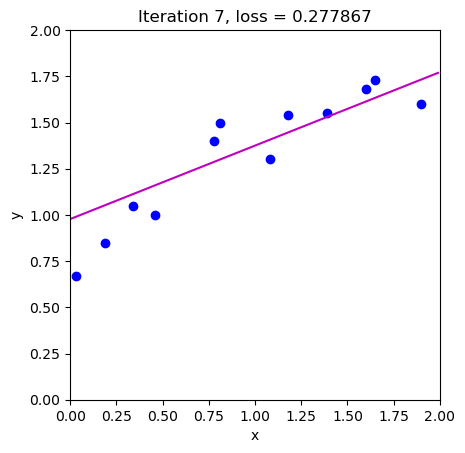

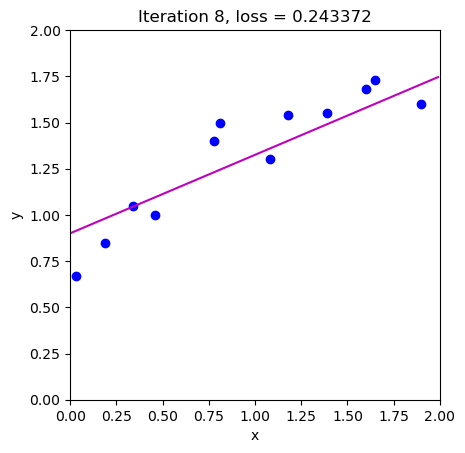

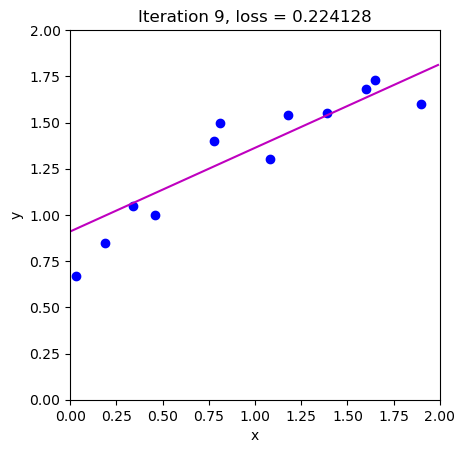

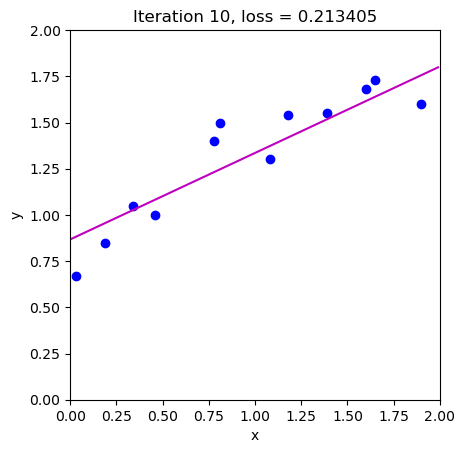

In [35]:
for c_step in range (n_steps):
  # Compute and undergo a gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Compute the loss and plot the model
  loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
  draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

### Plot Intermediate Loss Functions
Plot the intermediate loss functions throughout all the iterations

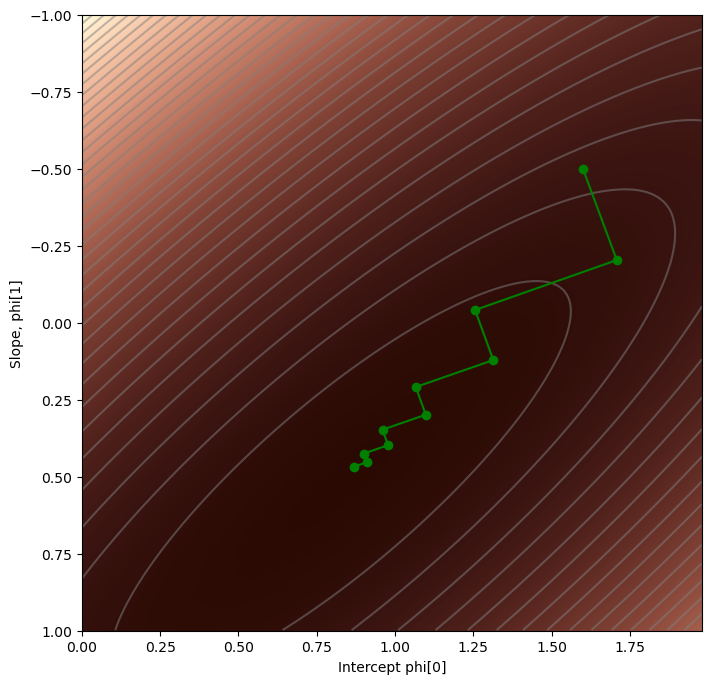

In [36]:
draw_loss_function(compute_loss, data, model,phi_all)